In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import accuracy_score


5


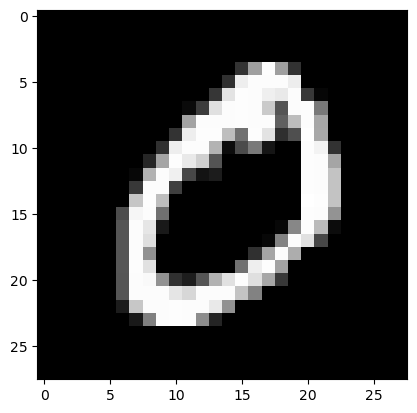

In [4]:
train_data, test_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
x_train = train_data[0].reshape(-1,784).astype(float) / 255
y_train = train_data[1]
print(y_train[0])
plt.imshow(train_data[0][1], cmap='gray')


In [5]:
# source: https://keras.io/guides/training_with_built_in_methods/

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x = layers.Dense(32, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation=None, name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#def loss(true, pred):
#    val = 0.
#    for i in range(len(true)):
#        val -= np.log(pred[i, true[i]])
#    return val / len(true)
model.summary()


Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 10)                330       
                                                                 
Total params: 26506 (103.54 KB)
Trainable params: 26506 (103.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Intrepretation** :

first the model has 2 layers each one has a 32 neurons and for each layer to make a decision the Relu the activation function is used.
for the last layer will produce a logits which the loss function will internally convert to probabilities using the softmax function

In [6]:
# untrained model
# here it takes the images where xtrain contains a 60000 records each one has a dimention of 784 that represents the data of one image
logits = model(x_train)
# here we search along the axis 1 which is the x axis
np.argmax(logits, 1)[0:100]
# shape 0 along the y axis
#print(logits.shape[0])

array([4, 5, 4, 4, 5, 4, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 3,
       2, 5, 4, 4, 4, 4, 4, 1, 7, 5, 4, 2, 4, 4, 4, 4, 7, 4, 4, 4, 4, 2,
       0, 5, 4, 4, 7, 2, 4, 4, 6, 1, 4, 7, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2,
       4, 2, 4, 4, 7, 5, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 5], dtype=int64)

In [7]:
# what we would like to get
y_train[0:100]

# counter = 0
# for i in range(2000):
#     if y_train[i] == np.argmax(logits,1)[i]:
#         counter +=1

# print(counter)

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

In [8]:
## Computing a stochastic gradient

# Source: https://keras.io/guides/writing_a_training_loop_from_scratch/

# Example of gradient computation using automatic differentiation

x_train_batch = x_train[:8]
y_train_batch = y_train[:8]
with tf.GradientTape() as tape:
        # Run the forward pass of the layer.
        # The operations that the layer applies
        # to its inputs are going to be recorded
        # on the GradientTape.
        logits = model(x_train_batch)  # Logits for this minibatch

        # Compute the loss value for this minibatch.
        loss_value = loss(y_train_batch, logits)

# Use the gradient tape to automatically retrieve
# the gradients of the trainable variables with respect to the loss.
grad = tape.gradient(loss_value, model.trainable_weights)
## Updating weights
def update_weights(model, update):
    new_weights = model.trainable_weights.copy()
    for i in range(len(new_weights)):
        new_weights[i] = new_weights[i] + update[i]
    model.set_weights(new_weights)

## Evaluate model
samples_for_evaluation = np.random.randint(0, 10000, 1000)
logits = model(x_train[samples_for_evaluation])
loss(y_train[samples_for_evaluation], logits).numpy()


2.3268774

**4.1**  

How many optimization variables are we going to train using this model?

the number of oprimization variables needed here (the weights) is the following :

for the first layer the input data has a size of 784 features (flatten matrix form the image which is the input) and we have 32 neurons for each one we need 784 parameters  over all neuron = 784*32 in addition there is a biais for each neuron so in Total = 784*32 +32

same for the rest of layers =====> dense one parameters = 32*32 + 32 

dense 2 ====> parameters = 32*10 + 10 

to answer the question the total number of parameters is : 784*32 + 32 + 32*32 +32 + 32*10 + 10 = 26506 parameters

**Part 5 and 6**



In [12]:

def update_model_weights(model, gradients, learning_rate):
    for w, g in zip(model.trainable_weights, gradients):
        w.assign_sub(learning_rate * g)

def evaluate_model(model, x_eval, y_eval, loss_fn):
    logits = model(x_eval)
    loss = loss_fn(y_eval, logits).numpy()
    return loss

def perform_sgd(model, x_data, y_data, loss_fn, batch_size=60, learning_rate=0.01, epochs=1):
    n_samples = x_data.shape[0]
    obj_values = []
    iterations = 0
    for _ in range(epochs):
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        x_data_shuffled = x_data[indices]
        y_data_shuffled = y_data[indices]
        for start_idx in tqdm(range(0, n_samples, batch_size)):
            end_idx = min(start_idx + batch_size, n_samples)
            x_batch = x_data_shuffled[start_idx:end_idx]
            y_batch = y_data_shuffled[start_idx:end_idx]
            with tf.GradientTape() as tape:
                logits_batch = model(x_batch)
                loss_value = loss_fn(y_batch, logits_batch)
            gradients = tape.gradient(loss_value, model.trainable_weights)
            update_model_weights(model, gradients, learning_rate)
            if iterations % 100 == 0:
                eval_loss = evaluate_model(model, x_data, y_data, loss_fn)
                obj_values.append(eval_loss)
            iterations += 1
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(obj_values)) * 10, obj_values, label="Objective Value")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title("Objective Value vs. Iterations")
    plt.legend()
    plt.grid(True)
    plt.show()


100%|██████████| 1000/1000 [00:10<00:00, 97.04it/s] 


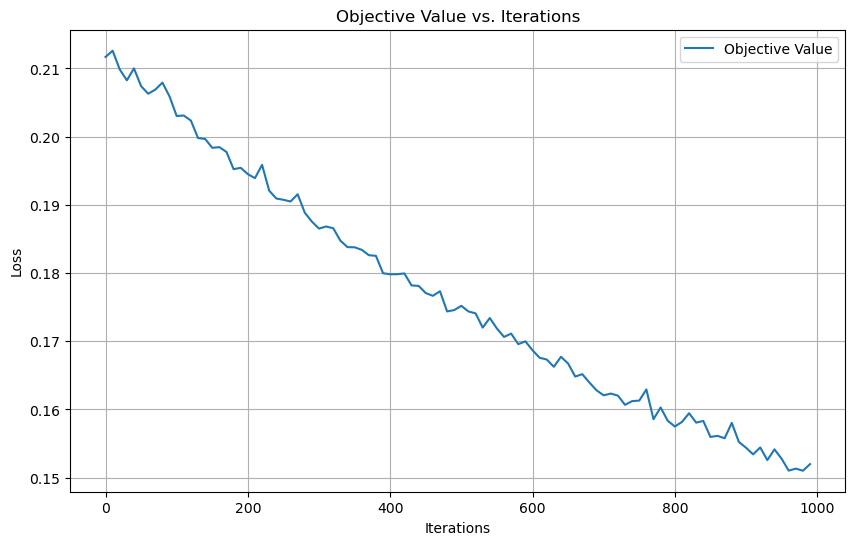

In [13]:
perform_sgd(model,x_train,y_train,loss,batch_size=60, learning_rate=0.01, epochs=10)

**Part 6.2**:




Batch processing in stochastic gradient descent (SGD) enhances computational efficiency by leveraging vectorized operations, reduces noise in the gradient estimates for more stable convergence, allows for more effective use of parallel processing architectures, and can lead to improved generalization by smoothing the loss landscape.

**Part7**:


In [11]:
def calculate_accuracy(model, x, y):
    logits = model(x, training=False)
    predicted_labels = np.argmax(logits, axis=1)
    accuracy = np.mean(predicted_labels == y) 
    return accuracy

# Calculate training accuracy
train_accuracy = calculate_accuracy(model, x_train, y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Calculate test accuracy
test_accuracy = calculate_accuracy(model, test_data[0].reshape(-1,784).astype(float) / 255, test_data[1])
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 93.97%
Test Accuracy: 93.96%
